# Lab 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from category_encoders import OneHotEncoder
from typing import ChainMap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Get and Explore Data

In [2]:
wa_housing_df = pd.read_csv('ST83446_kc_house_data_.csv')

In [3]:
wa_housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [4]:
wa_housing_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
wa_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [6]:
wa_housing_df.drop(['id'], axis=1, inplace = True)

In [7]:
year = wa_housing_df['date'].apply(lambda x: x.split('/')[2]).astype('int')

In [8]:
wa_housing_df.insert(2,'sales_year', year)

In [9]:
wa_housing_df['age_of_building']= wa_housing_df['sales_year'] - wa_housing_df['yr_built']

In [10]:
# wa_housing_df['years_from_ren']=0
# wa_housing_df.loc[wa_housing_df['yr_renovated']>0,'years_from_ren'] = wa_housing_df['sales_year']-wa_housing_df['yr_renovated']

In [11]:
# to see if house was renovated recently in 2015
wa_housing_df['2015_living_renovation'] = (wa_housing_df['sqft_living'] == wa_housing_df['sqft_living15']).astype('int')
wa_housing_df['2015_lot_renovation'] = (wa_housing_df['sqft_lot'] == wa_housing_df['sqft_lot15']).astype('int')

In [12]:
# price per sqft living and lot could be used as dependant value
# wa_housing_df['price_per_living_sqft'] = (wa_housing_df['price']/wa_housing_df['sqft_living15']).astype('int')
# wa_housing_df['price_per_lot_sqft'] = (wa_housing_df['price']/wa_housing_df['sqft_lot15']).astype('int')

In [13]:

wa_housing_df.drop(['yr_built','yr_renovated','date','sqft_living','sqft_lot'], axis=1, inplace=True)

In [14]:
wa_housing_df.dtypes

price                     float64
sales_year                  int64
bedrooms                    int64
bathrooms                 float64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
sqft_living15               int64
sqft_lot15                  int64
age_of_building             int64
2015_living_renovation      int64
2015_lot_renovation         int64
dtype: object

In [15]:
wa_housing_df['waterfront'] = wa_housing_df['waterfront'].astype('object')
wa_housing_df['view'] = wa_housing_df['view'].astype('object')
wa_housing_df['condition'] = wa_housing_df['condition'].astype('object')
wa_housing_df['2015_living_renovation'] = wa_housing_df['2015_living_renovation'].astype('object')
wa_housing_df['2015_lot_renovation'] = wa_housing_df['2015_lot_renovation'].astype('object')
wa_housing_df['sales_year'] = wa_housing_df['sales_year'].astype('object')

In [16]:
wa_housing_df['waterfront'].value_counts()

waterfront
0    21434
1      163
Name: count, dtype: int64

In [17]:
wa_housing_df['condition'].value_counts()

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [18]:
wa_housing_df['view'].value_counts()

view
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

In [19]:
wa_housing_df['2015_living_renovation'].value_counts()

2015_living_renovation
0    19034
1     2563
Name: count, dtype: int64

In [20]:

wa_housing_df['2015_lot_renovation'].value_counts()

2015_lot_renovation
0    17123
1     4474
Name: count, dtype: int64

In [21]:
wa_housing_df.dtypes

price                     float64
sales_year                 object
bedrooms                    int64
bathrooms                 float64
floors                    float64
waterfront                 object
view                       object
condition                  object
grade                       int64
sqft_above                  int64
sqft_basement               int64
sqft_living15               int64
sqft_lot15                  int64
age_of_building             int64
2015_living_renovation     object
2015_lot_renovation        object
dtype: object

In [22]:
categories_df = wa_housing_df.select_dtypes(include=['object'])
numerical_df = wa_housing_df.select_dtypes(include=['int64','float64'])

In [23]:
numerical_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.57,367368.14,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.37,0.93,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.12,0.77,0.5,1.75,2.25,2.5,8.0
floors,21597.0,1.49,0.54,1.0,1.00,1.50,2.0,3.5
grade,21597.0,7.66,1.17,3.0,7.00,7.00,8.0,13.0
sqft_above,21597.0,1788.60,827.76,370.0,1190.00,1560.00,2210.0,9410.0
sqft_basement,21597.0,291.73,442.67,0.0,0.00,0.00,560.0,4820.0
sqft_living15,21597.0,1986.62,685.23,399.0,1490.00,1840.00,2360.0,6210.0
sqft_lot15,21597.0,12758.28,27274.44,651.0,5100.00,7620.00,10083.0,871200.0
age_of_building,21597.0,43.32,29.38,-1.0,18.00,40.00,63.0,115.0


In [24]:
Quant_90 = numerical_df.quantile(0.9)
Quant_90.T

price              887000.0
bedrooms                4.0
bathrooms               3.0
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
Name: 0.9, dtype: float64

In [25]:
categories_df.describe().T

,count,unique,top,freq
sales_year,21597,2,2014,14622
waterfront,21597,2,0,21434
view,21597,5,0,19475
condition,21597,5,3,14020
2015_living_renovation,21597,2,0,19034
2015_lot_renovation,21597,2,0,17123


In [26]:
#sns.pairplot(numerical_df);

In [27]:
sns.set_style('whitegrid')

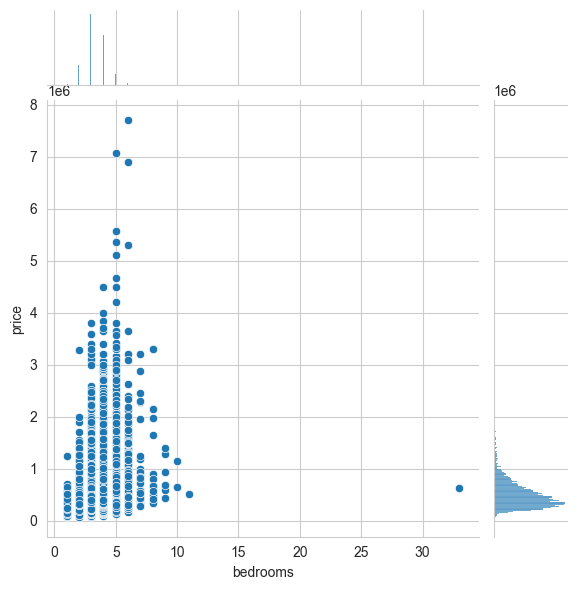

In [28]:
numerical_names = numerical_df.columns.tolist()
sns.jointplot(x= numerical_names[1], y = numerical_names[0], data=numerical_df);

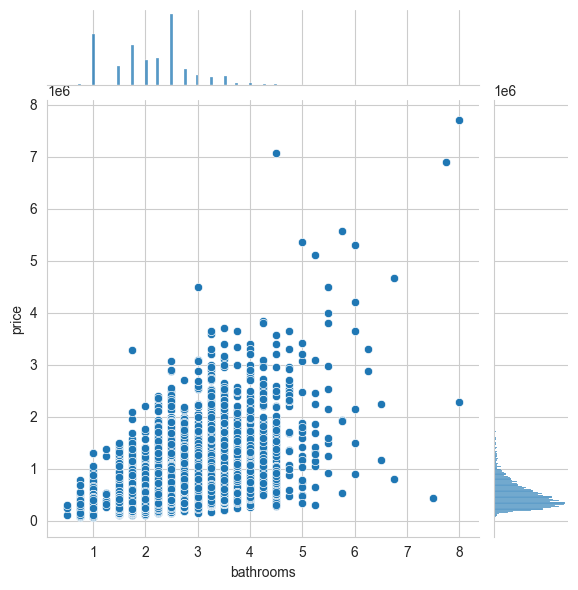

In [29]:

sns.jointplot(x= numerical_names[2], y = numerical_names[0], data=numerical_df);

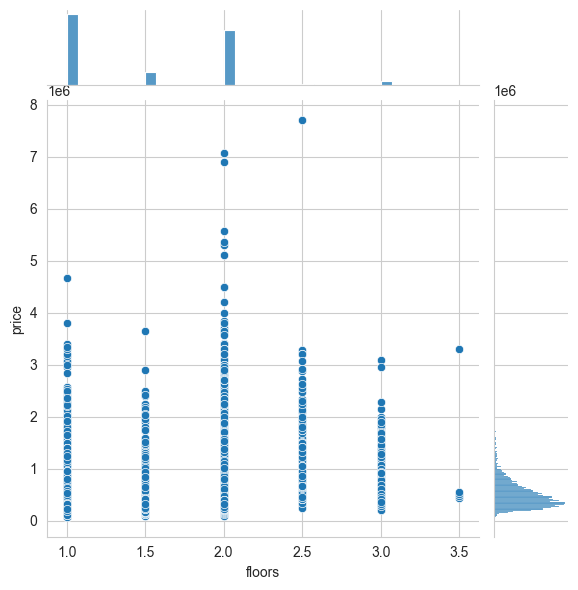

In [30]:
sns.jointplot(x= numerical_names[3], y = numerical_names[0], data=numerical_df);

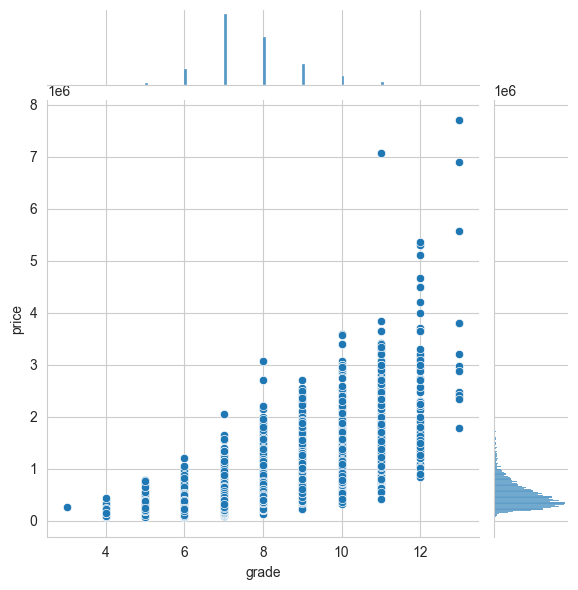

In [31]:
sns.jointplot(x= numerical_names[4], y = numerical_names[0], data=numerical_df);

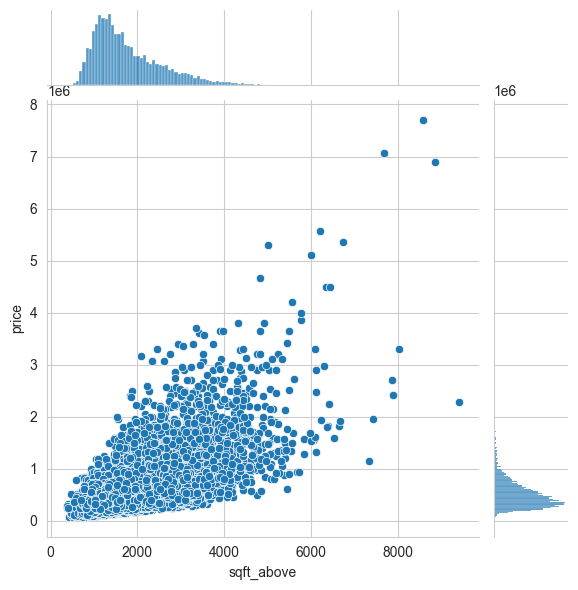

In [32]:

sns.jointplot(x= numerical_names[5], y = numerical_names[0], data=numerical_df);

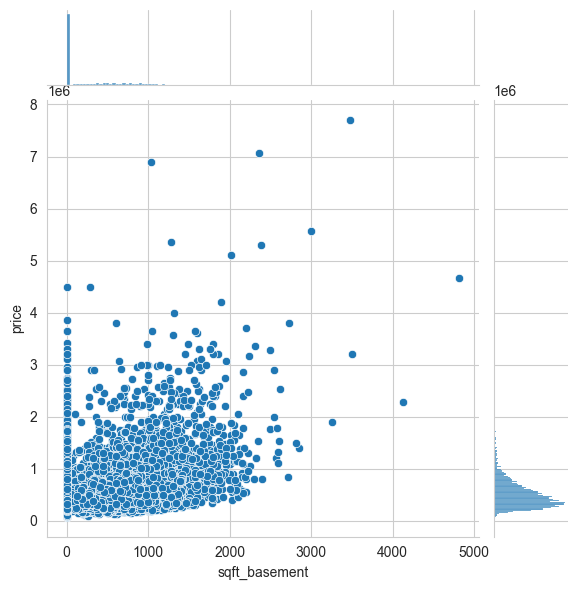

In [33]:

sns.jointplot(x= numerical_names[6], y = numerical_names[0], data=numerical_df);

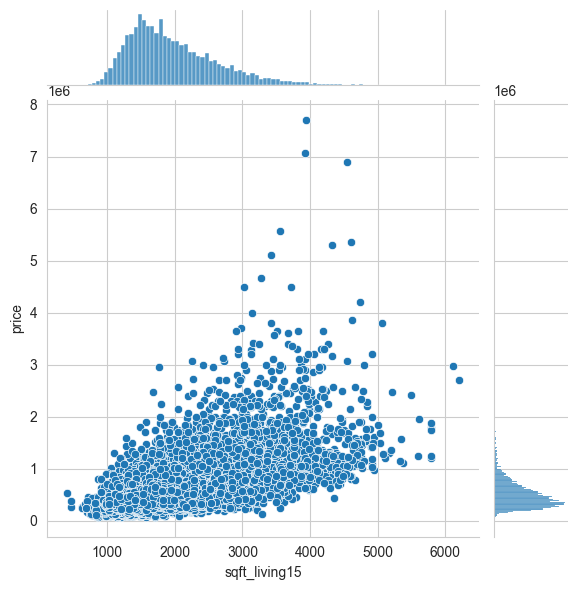

In [34]:

sns.jointplot(x= numerical_names[7], y = numerical_names[0], data=numerical_df);

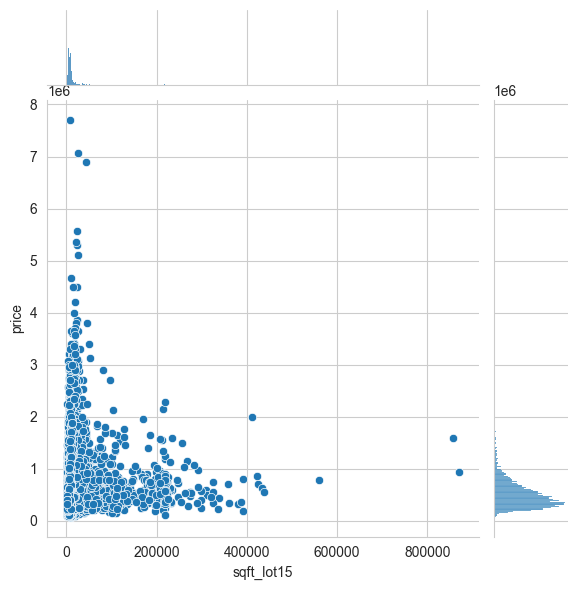

In [35]:

sns.jointplot(x= numerical_names[8], y = numerical_names[0], data=numerical_df);

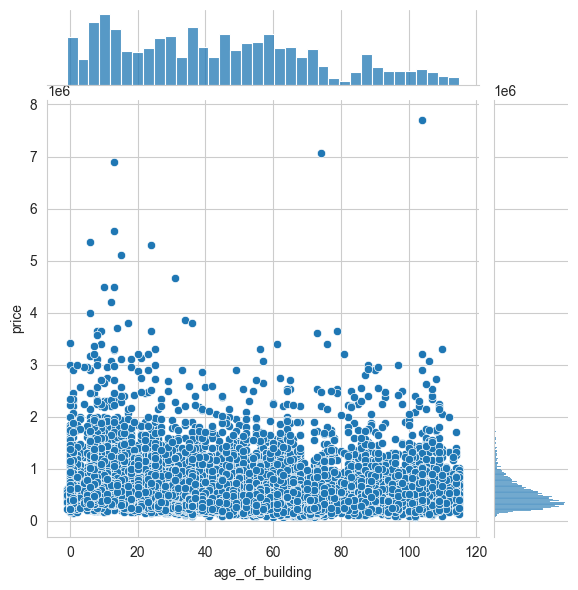

In [36]:

sns.jointplot(x= numerical_names[9], y = numerical_names[0], data=numerical_df);

<Axes: >

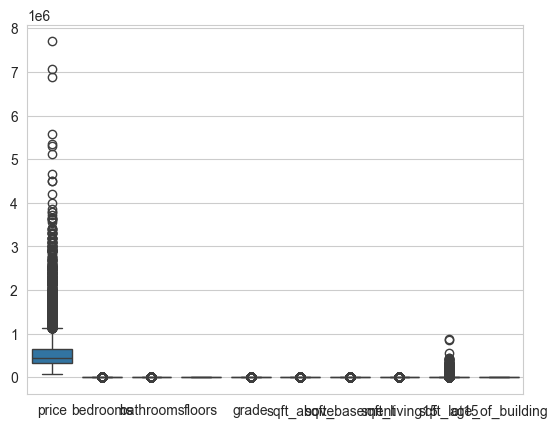

In [37]:
sns.boxplot(numerical_df)

## Correlation matrix

<Axes: >

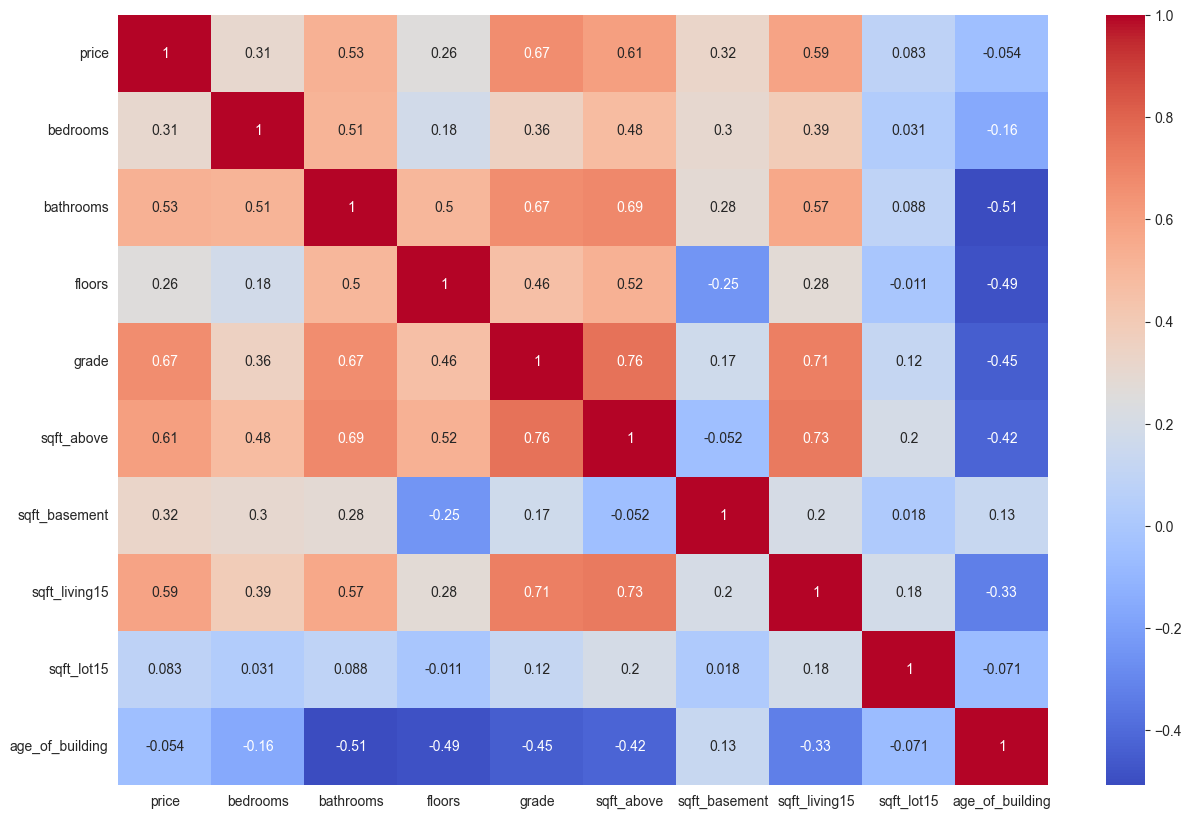

In [38]:
chain_map_w_outliers = numerical_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(chain_map_w_outliers, annot=True, cmap='coolwarm')

In [39]:
categories_df.columns

Index(['sales_year', 'waterfront', 'view', 'condition',
       '2015_living_renovation', '2015_lot_renovation'],
      dtype='object')

In [40]:
# categories where it has XOR relationship is droped to one
SY = pd.get_dummies(wa_housing_df['sales_year'],drop_first=False)
SY.drop([2014],axis=1, inplace = True)
SY.rename(columns={2015:"sold_in_2015"}, inplace = True)

W = pd.get_dummies(wa_housing_df['waterfront'],drop_first=False)
W.drop([0], axis=1, inplace=True)
W.rename(columns={1:'has_waterfront'}, inplace=True)


V = pd.get_dummies(wa_housing_df['view'],drop_first=False)
for i in range(len(V.columns)):
    V.rename(columns={V.columns[i]:"view" + str(i)}, inplace=True)

C = pd.get_dummies(wa_housing_df['condition'],drop_first=False)
for i in range(len(C.columns)):
    C.rename(columns={C.columns[i]:"condition" + str(i)}, inplace=True)

LiveR = pd.get_dummies(wa_housing_df['2015_living_renovation'],drop_first=False)
LiveR.drop([0],axis=1, inplace = True)
LiveR.rename(columns={1:"has_2015_living_renovation"}, inplace=True)


LotR = pd.get_dummies(wa_housing_df['2015_lot_renovation'],drop_first=False)
LotR.drop([0],axis=1, inplace = True)
LotR.rename(columns={1:'has_2015_lot_renovation'}, inplace=True)



In [41]:
working_data = wa_housing_df.copy()
working_data.drop(['view','condition','waterfront','sales_year', '2015_living_renovation','2015_lot_renovation'],axis=1, inplace=True)

In [42]:
working_data = pd.concat([working_data, SY, W, V, C, LiveR, LotR], axis=1)

In [43]:
working_data.head()

,price,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_building,...,view2,view3,view4,condition0,condition1,condition2,condition3,condition4,has_2015_living_renovation,has_2015_lot_renovation
0,221900.0,3,1.00,1.0,7,1180,0,1340,5650,59,...,False,False,False,False,False,True,False,False,False,True
1,538000.0,3,2.25,2.0,7,2170,400,1690,7639,63,...,False,False,False,False,False,True,False,False,False,False
2,180000.0,2,1.00,1.0,6,770,0,2720,8062,82,...,False,False,False,False,False,True,False,False,False,False
3,604000.0,4,3.00,1.0,7,1050,910,1360,5000,49,...,False,False,False,False,False,False,False,True,False,True
4,510000.0,3,2.00,1.0,8,1680,0,1800,7503,28,...,False,False,False,False,False,True,False,False,False,False


In [44]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       21597 non-null  float64
 1   bedrooms                    21597 non-null  int64  
 2   bathrooms                   21597 non-null  float64
 3   floors                      21597 non-null  float64
 4   grade                       21597 non-null  int64  
 5   sqft_above                  21597 non-null  int64  
 6   sqft_basement               21597 non-null  int64  
 7   sqft_living15               21597 non-null  int64  
 8   sqft_lot15                  21597 non-null  int64  
 9   age_of_building             21597 non-null  int64  
 10  sold_in_2015                21597 non-null  bool   
 11  has_waterfront              21597 non-null  bool   
 12  view0                       21597 non-null  bool   
 13  view1                       215

In [45]:
bool_columns = working_data.select_dtypes(include='bool').columns 
working_data[bool_columns] = working_data[bool_columns].astype(int)


In [46]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       21597 non-null  float64
 1   bedrooms                    21597 non-null  int64  
 2   bathrooms                   21597 non-null  float64
 3   floors                      21597 non-null  float64
 4   grade                       21597 non-null  int64  
 5   sqft_above                  21597 non-null  int64  
 6   sqft_basement               21597 non-null  int64  
 7   sqft_living15               21597 non-null  int64  
 8   sqft_lot15                  21597 non-null  int64  
 9   age_of_building             21597 non-null  int64  
 10  sold_in_2015                21597 non-null  int64  
 11  has_waterfront              21597 non-null  int64  
 12  view0                       21597 non-null  int64  
 13  view1                       215

## Training and Testing Linear Regression Model

In [47]:
y = working_data['price']
X = working_data.drop(['price'], axis =1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-4.33753961e+04  5.01254408e+04  3.02902213e+04  1.22041165e+05
  1.57119787e+02  1.68117191e+02  2.95190568e+01 -6.01394004e-01
  3.65114646e+03  2.40449333e+04  4.80723516e+05 -1.08732121e+05
  2.45686403e+03 -6.98378842e+04 -3.81132294e+03  1.79924464e+05
 -2.39899627e+04 -7.96376590e+03 -1.13722108e+04  1.89762838e+03
  4.14283110e+04 -6.47321989e+03  1.79201974e+04]


In [52]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
bedrooms,-43375.396092
bathrooms,50125.440791
floors,30290.221290
grade,122041.164892
sqft_above,157.119787
sqft_basement,168.117191
sqft_living15,29.519057
sqft_lot15,-0.601394
age_of_building,3651.146463
sold_in_2015,24044.933283


In [53]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted y')

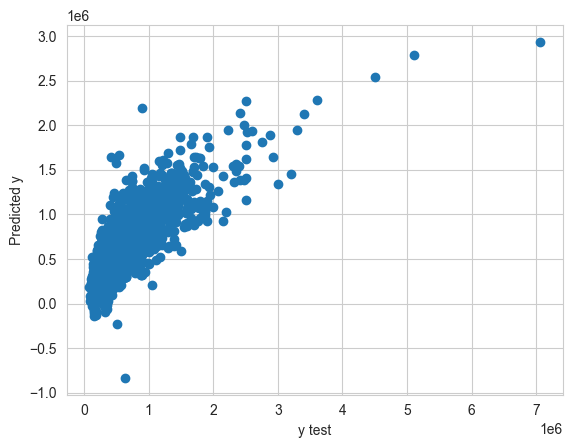

In [54]:
plt.scatter(y_test, predictions)
plt.xlabel('y test')
plt.ylabel('Predicted y')


In [55]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
error_score = metrics.r2_score(y_test, predictions)

In [56]:
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2 Error: {error_score}')

MAE: 140986.18410885672
MSE: 47298277977.956055
RMSE: 217481.67274038531
R2 Error: 0.6367713934327982


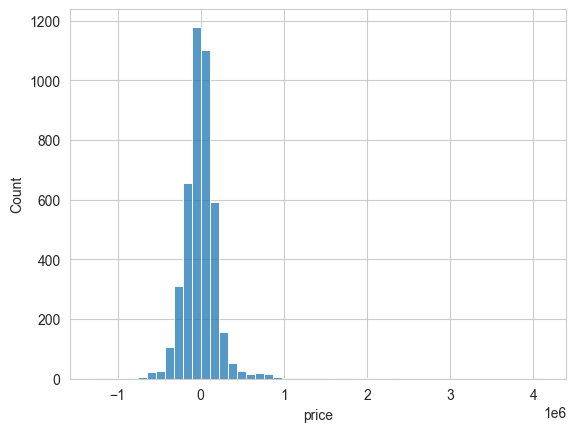

In [57]:
sns.histplot((y_test-predictions),bins =50);

In [58]:
X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)

In [59]:
model2 = sm.OLS(y_train, X2_train)

In [60]:
model2_ = model2.fit()

In [61]:
print(model2_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1614.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:11   Log-Likelihood:            -2.3659e+05
No. Observations:               17277   AIC:                         4.732e+05
Df Residuals:                   17255   BIC:                         4.734e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Standardising Data

In [62]:
scaler = StandardScaler()

In [63]:
scaled_working_data = pd.DataFrame(scaler.fit_transform(working_data), columns=working_data.columns)

In [64]:
scaled_working_data.head()

,price,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_building,...,view2,view3,view4,condition0,condition1,condition2,condition3,condition4,has_2015_living_renovation,has_2015_lot_renovation
0,-0.866716,-0.402903,-1.451073,-0.915552,-0.560800,-0.735251,-0.659031,-0.943676,-0.260627,0.533646,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,1.956329
1,-0.006252,-0.402903,0.174486,0.937431,-0.560800,0.460776,0.244602,-0.432887,-0.187700,0.669809,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,-0.511161
2,-0.980773,-1.482493,-1.451073,-0.915552,-1.413190,-1.230575,-0.659031,1.070292,-0.172190,1.316582,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,-0.511161
3,0.173409,0.676687,1.149821,-0.915552,-0.560800,-0.892305,1.396734,-0.914488,-0.284459,0.193239,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,-1.360271,-0.597156,3.420036,-0.366952,1.956329
4,-0.082471,-0.402903,-0.150626,-0.915552,0.291589,-0.131197,-0.659031,-0.272353,-0.192686,-0.521615,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,-0.511161


In [65]:
y_scaled = scaled_working_data['price']
X_scaled = scaled_working_data.drop(['price'], axis=1)

In [66]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [67]:
lm = LinearRegression()
lm.fit(X_scaled_train, y_scaled_train)

LinearRegression()

In [68]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
bedrooms,-1.121017e-01
bathrooms,1.064052e-01
floors,4.460164e-02
grade,3.926896e-01
sqft_above,3.521592e-01
sqft_basement,2.016273e-01
sqft_living15,5.434953e-02
sqft_lot15,-4.523712e-02
age_of_building,2.925553e-01
sold_in_2015,3.017561e-02


In [69]:
predictions_scaled = lm.predict(X_scaled_test)

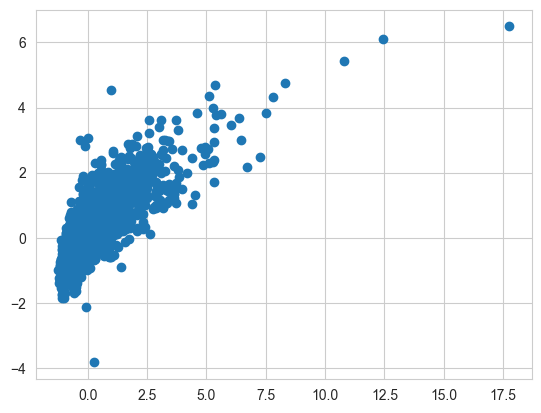

In [70]:
plt.scatter(y_scaled_test,predictions_scaled);

In [71]:
MAE_scaled = metrics.mean_absolute_error(y_scaled_test, predictions_scaled)
MSE_scaled = metrics.mean_squared_error(y_scaled_test, predictions_scaled)
RMSE_scaled = np.sqrt(metrics.mean_squared_error(y_scaled_test, predictions_scaled))
error_score_scaled = metrics.r2_score(y_scaled_test, predictions_scaled)

In [72]:
print(f'MAE: {MAE_scaled}')
print(f'MSE: {MSE_scaled}')
print(f'RMSE: {RMSE_scaled}')
print(f'R2 Error: {error_score_scaled}')

MAE: 0.3837837517593273
MSE: 0.35074637221237726
RMSE: 0.5922384420251503
R2 Error: 0.6364946788138336


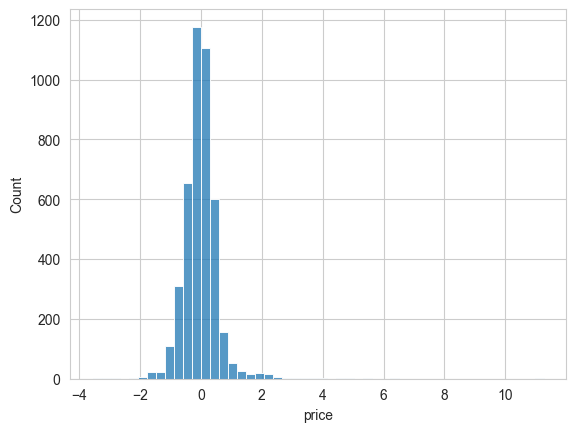

In [73]:
sns.histplot((y_scaled_test-predictions_scaled),bins =50);

In [74]:
X2_train_scaled = sm.add_constant(X_scaled_train)
X2_test_scaled = sm.add_constant(X_scaled_test)

In [75]:
model2scaled = sm.OLS(y_scaled_train, X2_train_scaled)

In [76]:
model2scaled_ = model2scaled.fit()

In [77]:
print(model2scaled_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1614.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:12   Log-Likelihood:                -15202.
No. Observations:               17277   AIC:                         3.045e+04
Df Residuals:                   17255   BIC:                         3.062e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Cleaning outliers

In [78]:
wa_housing_df_cleaned = wa_housing_df
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['price']<=Quant_90[0]]

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/3271469099.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['price']<=Quant_90[0]]


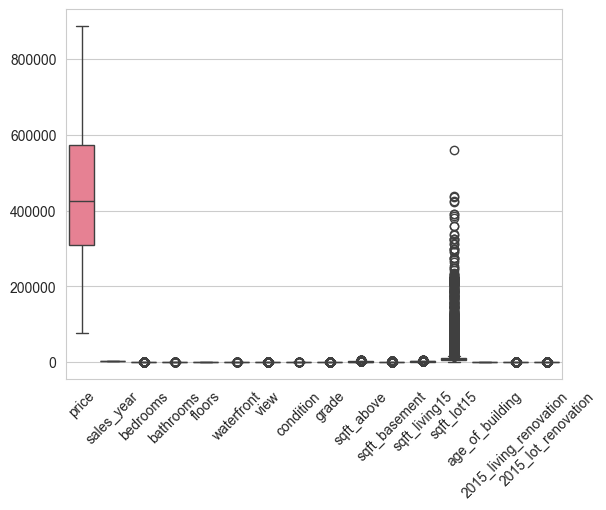

In [79]:
ax = sns.boxplot(wa_housing_df_cleaned)
ax.tick_params(axis='x', rotation=45)
plt.show()

In [80]:
Quant_90

price              887000.0
bedrooms                4.0
bathrooms               3.0
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
Name: 0.9, dtype: float64

<Axes: ylabel='bedrooms'>

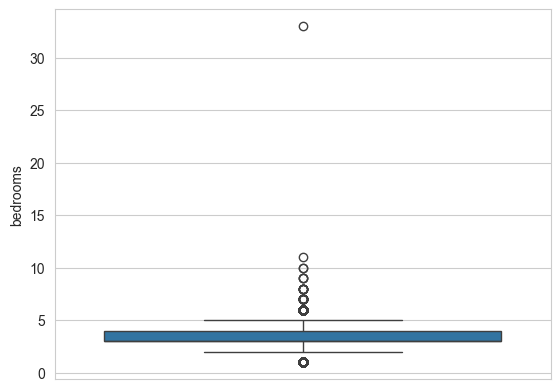

In [81]:
sns.boxplot(wa_housing_df_cleaned['bedrooms'])

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/3949781514.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['bedrooms']<=Quant_90[1]]


<Axes: ylabel='bedrooms'>

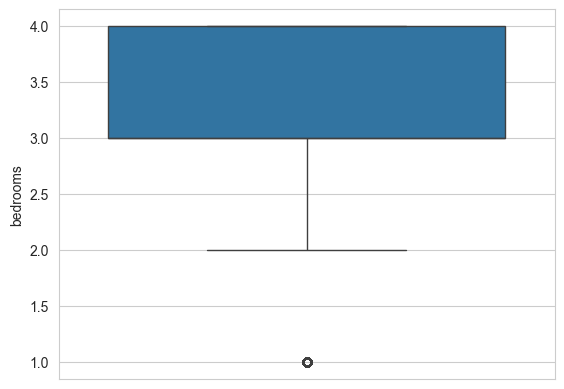

In [82]:
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['bedrooms']<=Quant_90[1]]
sns.boxplot(wa_housing_df_cleaned['bedrooms'])

In [83]:
Quant_90[7]

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/4011980465.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Quant_90[7]


2930.0

In [84]:

wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['floors']<=Quant_90[3]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['grade']<=Quant_90[4]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_above']<=Quant_90[5]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_basement']<=Quant_90[6]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_living15']<=Quant_90[7]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_lot15']<=Quant_90[8]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['age_of_building']<=Quant_90[9]]




/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/856575535.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['floors']<=Quant_90[3]]
/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/856575535.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['grade']<=Quant_90[4]]
/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/856575535.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_13911/856575535.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['age_of_building']<=Quant_90[9]]


<Axes: >

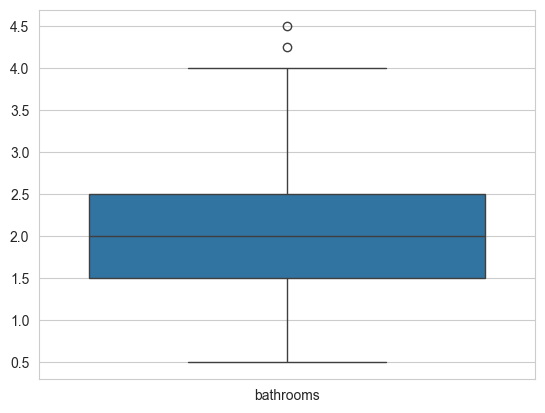

In [85]:
sns.boxplot(data=wa_housing_df_cleaned[['bathrooms']])

<Axes: ylabel='floors'>

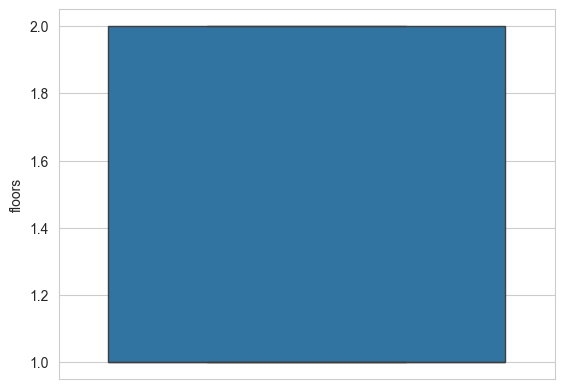

In [86]:

sns.boxplot(wa_housing_df_cleaned['floors'])

<Axes: ylabel='grade'>

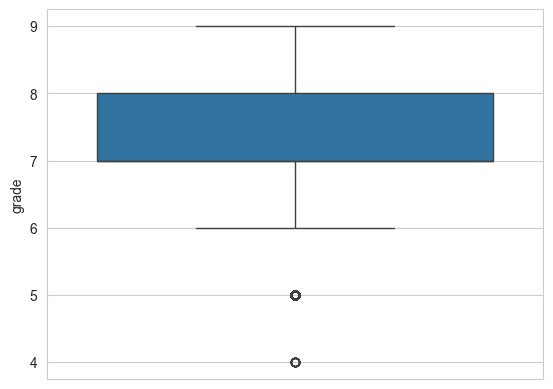

In [87]:

sns.boxplot(wa_housing_df_cleaned['grade'])

<Axes: ylabel='sqft_above'>

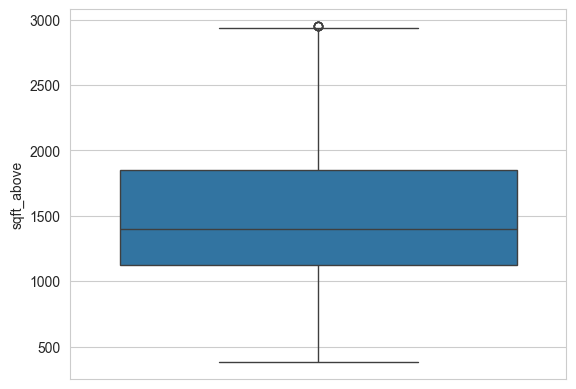

In [88]:

sns.boxplot(wa_housing_df_cleaned['sqft_above'])

<Axes: ylabel='sqft_basement'>

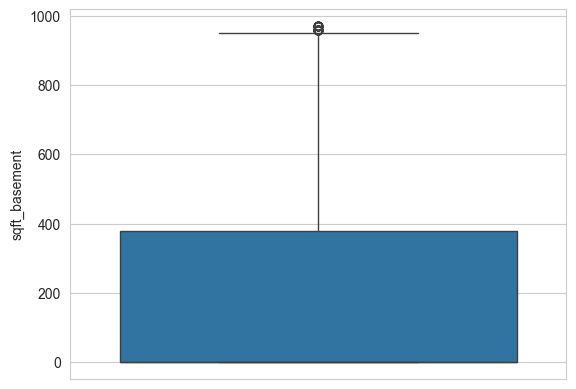

In [89]:
sns.boxplot(wa_housing_df_cleaned['sqft_basement'])

<Axes: ylabel='sqft_living15'>

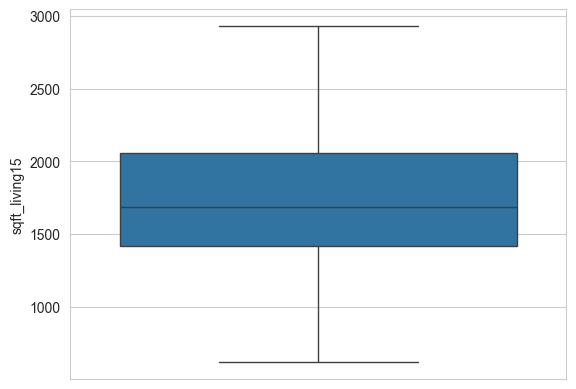

In [90]:
sns.boxplot(wa_housing_df_cleaned['sqft_living15'])

<Axes: ylabel='sqft_lot15'>

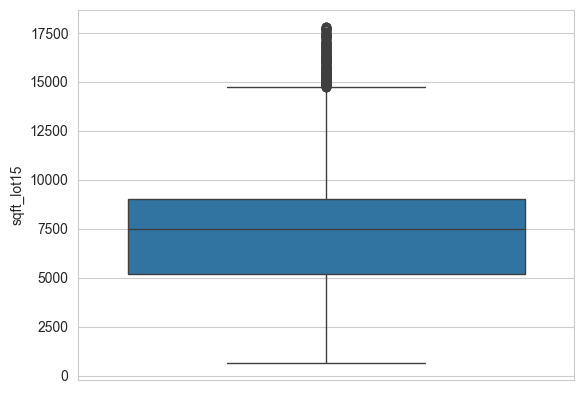

In [91]:
sns.boxplot(wa_housing_df_cleaned['sqft_lot15'])

<Axes: ylabel='age_of_building'>

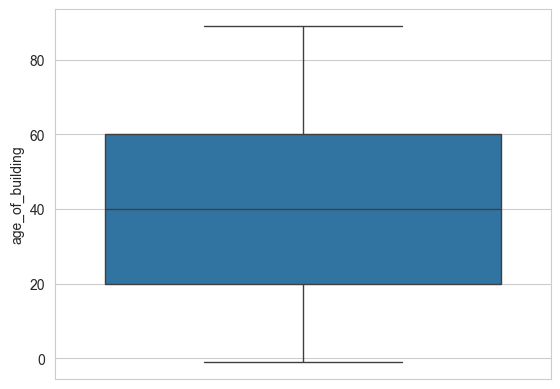

In [92]:
sns.boxplot(wa_housing_df_cleaned['age_of_building'])

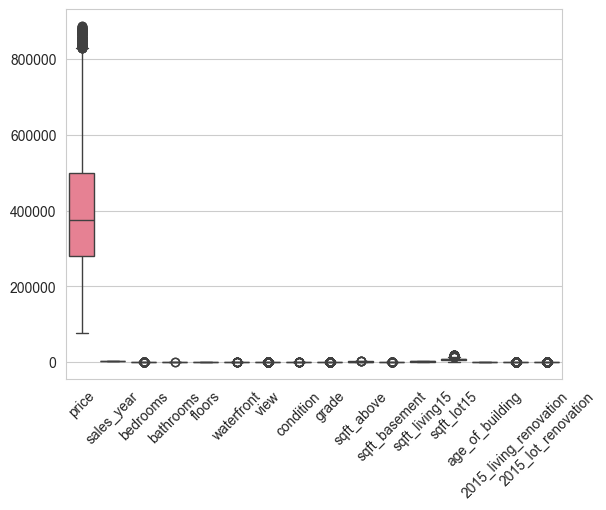

In [93]:
ax = sns.boxplot(wa_housing_df_cleaned)
ax.tick_params(axis='x', rotation=45)
plt.show()